# Previsão de Desempenho de Jogadores para Ligas de Futebol

Nome: David Machado Couto Bezerra
Matricula: 475664

dataset: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

O objetivo deste trabalho prático é desenvolver um modelo de aprendizado de máquina capaz de prever o overall rating, potencial e valor de mercado de jogadores do jogo FIFA, com base em dados históricos disponíveis no Banco de Dados de Futebol.

O conjunto de dados utilizado para treinar e avaliar o modelo é composto por informações de diversos países e ligas, atributos dos jogadores e características das equipes. O objetivo é explorar esses dados para construir um modelo confiável e preciso na previsão do desempenho dos jogadores e times.

Este trabalho utiliza a linguagem de programação Python e a biblioteca Scikit-learn para a implementação do modelo de regressão, bem como as bibliotecas Pandas e Matplotlib para a análise e visualização dos dados.

Nesta etapa final, foram carregados dados de diferentes edições do jogo FIFA (de FIFA 15 a FIFA 22) de uma planilha Excel e combinados em um único DataFrame.

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# FASE FINAL
PATH = '/content/drive/MyDrive/Colab Notebooks/Trabalho Final - ML/Career Mode player datasets - FIFA 15-22.xlsx'
sheet_names = ['FIFA 15', 'FIFA 16', 'FIFA 17', 'FIFA 18', 'FIFA 19', 'FIFA 20', 'FIFA 21', 'FIFA 22']
dfs = []

for sheet_name in sheet_names:
    df = pd.read_excel(PATH, sheet_name=sheet_name)
    df['Version'] = sheet_name
    dfs.append(df)

merged_df = pd.concat(dfs)

Neste trecho de código, foi criado um novo DataFrame chamado "df_fifa" selecionando colunas específicas do DataFrame "merged_df". O objetivo é extrair as informações relevantes dos jogadores, como nome, idade, altura, peso, habilidades, estatísticas de jogo, valor de mercado, entre outros. O número de linhas e colunas do DataFrame resultante também foi impresso.

In [ ]:
df_fifa = merged_df[['short_name','age','dob','height_cm','weight_kg','nationality_name','club_name','overall','potential',
          'value_eur','wage_eur','player_positions','preferred_foot','international_reputation',
          'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'Version']]
print(f'The database has {df_fifa.shape[0]} rows and {df_fifa.shape[1]} columns')
df_fifa

The database has 142079 rows and 23 columns


,short_name,age,dob,height_cm,weight_kg,nationality_name,club_name,overall,potential,value_eur,...,international_reputation,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,Version
0,L. Messi,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,100500000.0,...,5,4,Medium/Low,93.0,89.0,86.0,96.0,27.0,63.0,FIFA 15
1,Cristiano Ronaldo,29,1985-02-05,185,80,Portugal,Real Madrid CF,92,92,79000000.0,...,5,5,High/Low,93.0,93.0,81.0,91.0,32.0,79.0,FIFA 15
2,A. Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,54500000.0,...,5,4,High/Low,93.0,86.0,83.0,92.0,32.0,64.0,FIFA 15
3,Z. Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,52500000.0,...,5,4,Medium/Low,76.0,91.0,81.0,86.0,34.0,86.0,FIFA 15
4,M. Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,63500000.0,...,5,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,FIFA 15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,1999-01-02,180,64,China PR,Wuhan FC,47,52,70000.0,...,1,2,Medium/Medium,58.0,35.0,46.0,48.0,42.0,49.0,FIFA 22
19235,C. Porter,19,2002-03-18,175,70,Republic of Ireland,Derry City,47,59,110000.0,...,1,2,Medium/Medium,59.0,39.0,50.0,46.0,41.0,51.0,FIFA 22
19236,N. Logue,21,2000-02-07,178,72,Republic of Ireland,Finn Harps,47,55,100000.0,...,1,2,Medium/Medium,60.0,37.0,45.0,49.0,41.0,52.0,FIFA 22
19237,L. Rudden,19,2002-04-23,173,66,Republic of Ireland,Finn Harps,47,60,110000.0,...,1,2,Medium/Medium,68.0,46.0,36.0,48.0,15.0,42.0,FIFA 22


In [ ]:
df_fifa.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,skill_moves,pace,shooting,passing,dribbling,defending,physic
count,142079.000000,142079.000000,142079.000000,142079.000000,142079.000000,1.401820e+05,140457.000000,142079.000000,142079.000000,126288.000000,126288.000000,126288.000000,126288.000000,126288.000000,126288.000000
mean,25.117125,181.206470,75.247911,65.706121,70.726335,2.268820e+06,11113.728045,1.110073,2.325615,67.982366,52.189480,56.887741,62.013944,51.051121,64.827933
std,4.659230,6.734544,6.997585,7.064665,6.271695,5.779823e+06,22251.563020,0.387243,0.749024,11.124564,13.936206,10.553368,10.397918,16.694917,9.730786
min,16.000000,154.000000,49.000000,40.000000,40.000000,1.000000e+03,500.000000,1.000000,1.000000,21.000000,14.000000,20.000000,22.000000,14.000000,27.000000
25%,21.000000,176.000000,70.000000,61.000000,66.000000,3.000000e+05,2000.000000,1.000000,2.000000,62.000000,42.000000,50.000000,56.000000,36.000000,59.000000
50%,25.000000,181.000000,75.000000,66.000000,70.000000,7.000000e+05,4000.000000,1.000000,2.000000,69.000000,54.000000,58.000000,63.000000,56.000000,66.000000
75%,28.000000,186.000000,80.000000,70.000000,75.000000,1.800000e+06,10000.000000,1.000000,3.000000,75.000000,63.000000,64.000000,69.000000,64.000000,72.000000
max,54.000000,208.000000,110.000000,94.000000,95.000000,1.940000e+08,575000.000000,5.000000,5.000000,97.000000,94.000000,93.000000,96.000000,91.000000,92.000000


In [ ]:
filtered_df = df_fifa.loc[df_fifa['short_name'] == 'K. Mbappé']
filtered_df

,short_name,age,dob,height_cm,weight_kg,nationality_name,club_name,overall,potential,value_eur,...,international_reputation,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,Version
196,K. Mbappé,18,1998-12-20,178,73,France,Paris Saint-Germain,83,94,41500000.0,...,3,4,High/Medium,90.0,80.0,74.0,85.0,47.0,74.0,FIFA 18
56,K. Mbappé,19,1998-12-20,178,73,France,Paris Saint-Germain,87,95,72000000.0,...,3,5,High/Medium,96.0,81.0,79.0,89.0,39.0,72.0,FIFA 19
22,K. Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,89,95,93500000.0,...,3,5,High/Low,96.0,84.0,78.0,90.0,39.0,75.0,FIFA 20
11,K. Mbappé,21,1998-12-20,178,73,France,Paris Saint-Germain,90,95,185500000.0,...,3,5,High/Low,96.0,86.0,78.0,91.0,39.0,76.0,FIFA 21
6,K. Mbappé,22,1998-12-20,182,73,France,Paris Saint-Germain,91,95,194000000.0,...,4,5,High/Low,97.0,88.0,80.0,92.0,36.0,77.0,FIFA 22


Os gráficos mostram a relação entre o potencial dos jogadores e duas variáveis: salário e valor de mercado em euros.



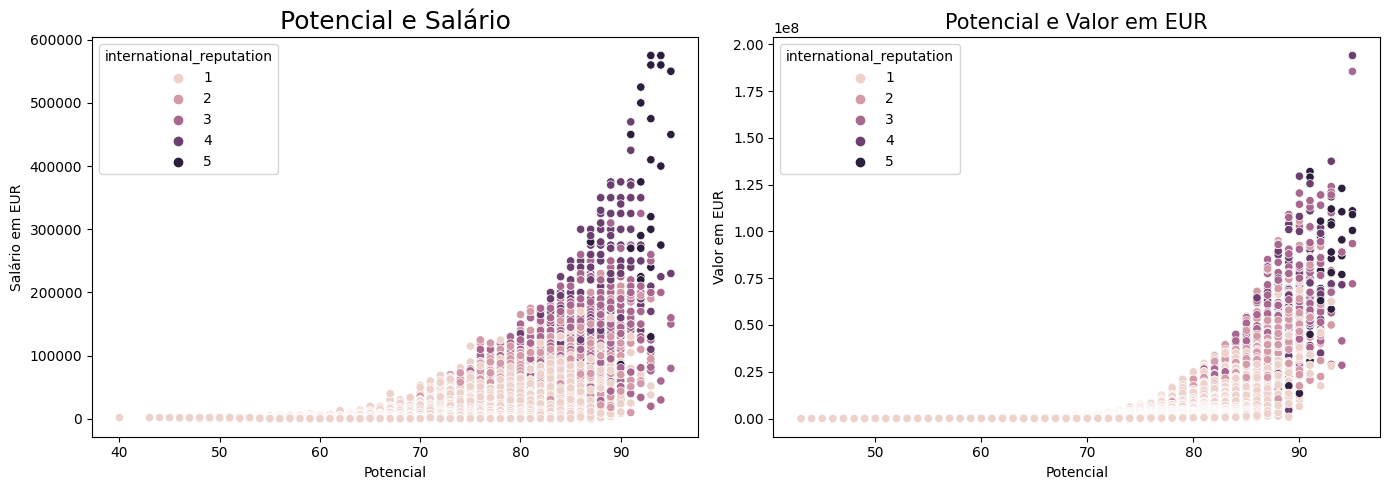

In [ ]:
# Configuração dos gráficos
plt.figure(figsize=(14, 5))
plt.rcParams['font.family'] = 'DejaVu Sans'

# Gráfico 1: Potencial e Salário (filtrado por reputação internacional)
plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x=df_fifa['potential'], y=df_fifa['wage_eur'], hue=df_fifa['international_reputation'])
plt.xlabel("Potencial")
plt.ylabel("Salário em EUR")
plt.title("Potencial e Salário", fontsize=18)

# Gráfico 2: Potencial e Valor em EUR (filtrado por reputação internacional)
plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=df_fifa['potential'], y=df_fifa['value_eur'], hue=df_fifa['international_reputation'])
plt.xlabel("Potencial")
plt.ylabel("Valor em EUR")
plt.title("Potencial e Valor em EUR", fontsize=15)

# Ajustes de layout
plt.tight_layout()

# Exibição dos gráficos
plt.show()

Aqui estão os gráficos que mostram a distribuição das principais métricas do conjunto de dados. O primeiro gráfico representa a distribuição dos salários em euros, onde podemos observar a contagem de jogadores em diferentes faixas salariais. O segundo gráfico mostra a distribuição das idades dos jogadores, destacando a contagem em cada faixa etária. Os dois últimos gráficos utilizam o Seaborn e apresentam a distribuição da altura e peso dos jogadores, com curvas de densidade para visualizar a concentração em determinadas faixas.

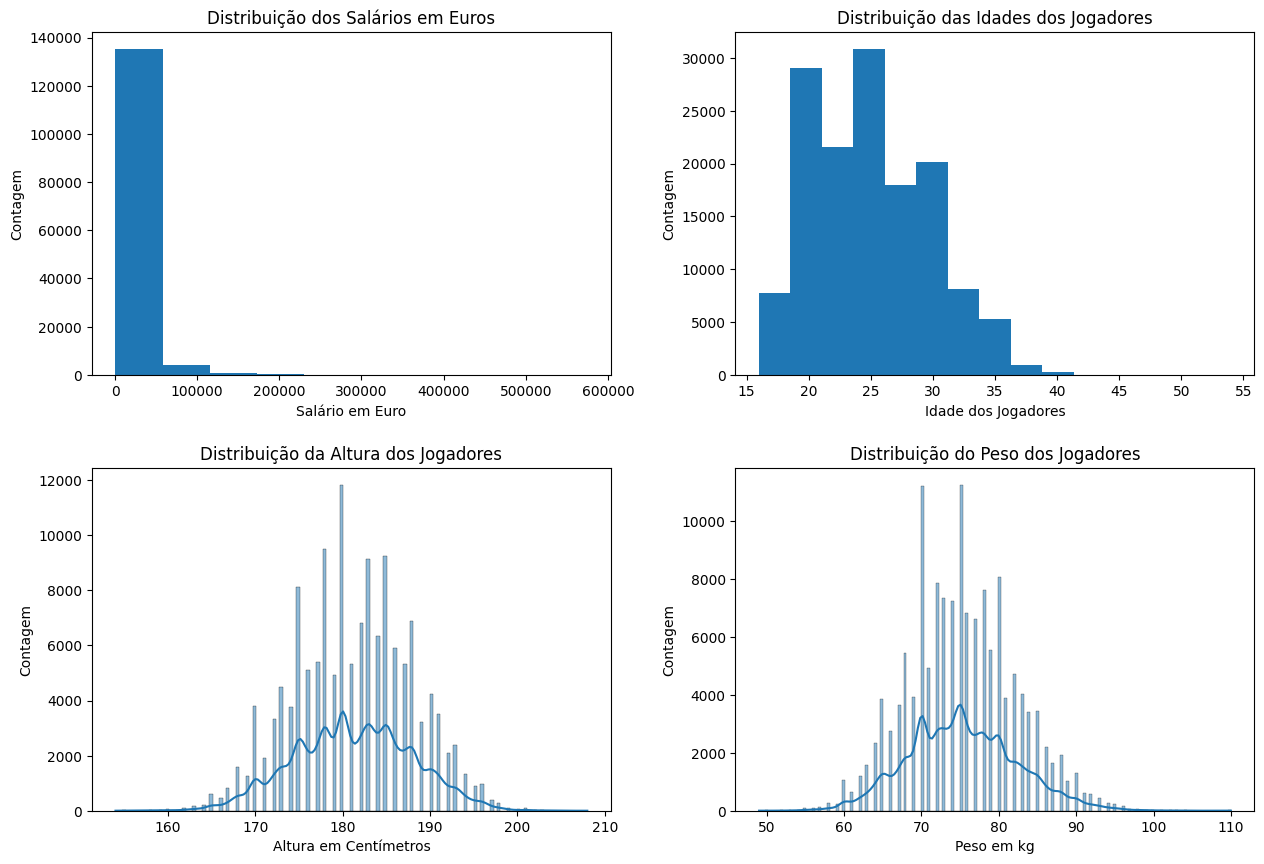

In [ ]:
# Vamos visualizar a distribuição das principais métricas

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0, 0].hist(df_fifa['wage_eur'])
axes[0, 0].set_xlabel('Salário em Euro')
axes[0, 0].set_ylabel('Contagem')
axes[0, 0].set_title('Distribuição dos Salários em Euros')

axes[0, 1].hist(df_fifa['age'], bins=15)
axes[0, 1].set_xlabel('Idade dos Jogadores')
axes[0, 1].set_ylabel('Contagem')
axes[0, 1].set_title('Distribuição das Idades dos Jogadores')

# Os próximos dois gráficos serão feitos utilizando a sintaxe do Seaborn
axes[1, 0].set_title('Distribuição da Altura dos Jogadores')
sns.histplot(df_fifa, x='height_cm', ax=axes[1, 0], kde=True)
axes[1, 0].set_xlabel('Altura em Centímetros')
axes[1, 0].set_ylabel('Contagem')

axes[1, 1].set_title('Distribuição do Peso dos Jogadores')
sns.histplot(df_fifa, x='weight_kg', ax=axes[1, 1], kde=True)
axes[1, 1].set_xlabel('Peso em kg')
axes[1, 1].set_ylabel('Contagem')

plt.tight_layout(pad=2)
plt.show()


O código acima irá gerar um gráfico de barras mostrando as cinco posições de jogador mais comuns no conjunto de dados.

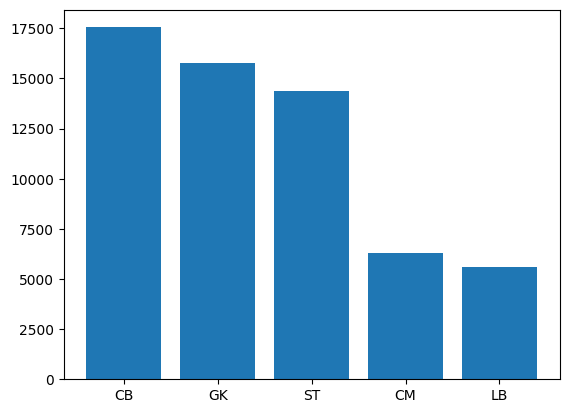

In [ ]:
from collections import Counter

def plot_most_common(category):
    bar_plot = dict(Counter(df_fifa[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

plot_most_common('player_positions')

O código abaixo gera um mapa de calor para visualizar a correlação entre diferentes atributos dos jogadores do FIFA.

<ipython-input-9-6ebdb1d75089>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = heatmap_data.corr()


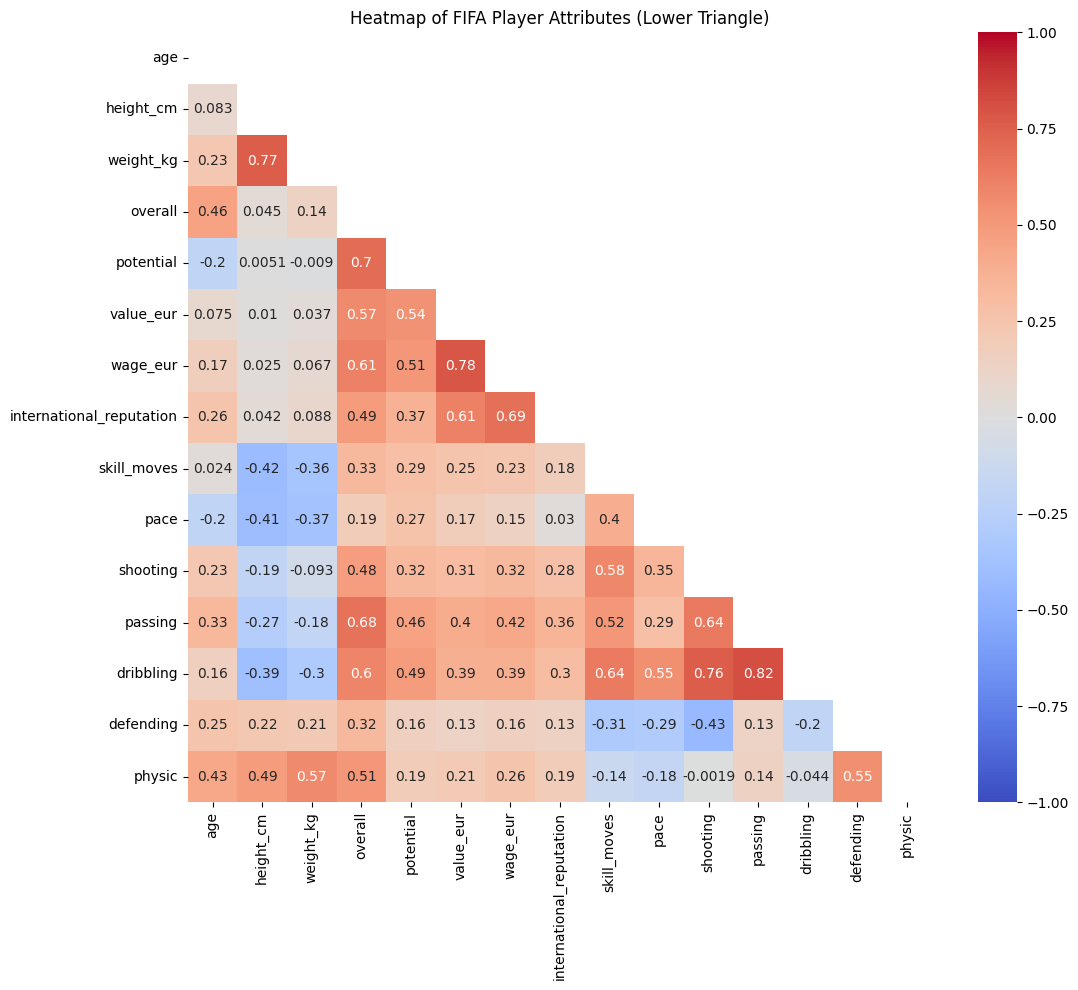

In [ ]:
import seaborn as sns
import numpy as np

heatmap_data = df_fifa[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur',
                       'international_reputation', 'skill_moves', 'work_rate', 'pace', 'shooting',
                       'passing', 'dribbling', 'defending', 'physic']]

correlation_matrix = heatmap_data.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of FIFA Player Attributes (Lower Triangle)')
plt.show()


é criado variáveis dummy para codificar as posições dos jogadores usando o método pd.get_dummies() e concatena essas variáveis codificadas ao dataframe df_fifa. Isso permite que as posições dos jogadores sejam representadas como variáveis numéricas para uso em modelos de aprendizado de máquina.

In [ ]:
df_fifa = df_fifa[['age','height_cm','weight_kg','overall','potential',
          'value_eur','wage_eur', 'player_positions', 'international_reputation',
          'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

positions = df_fifa['player_positions'].unique()
encoded_positions = pd.get_dummies(df_fifa['player_positions'])
df_fifa = pd.concat([df_fifa, encoded_positions], axis=1)

In [ ]:
df_fifa = df_fifa[['age','height_cm','weight_kg','overall','potential',
          'value_eur','wage_eur', 'international_reputation',
          'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

O código abaixo utiliza o SimpleImputer da biblioteca sklearn.impute para preencher os valores ausentes nas colunas numéricas do dataframe df_fifa.

In [ ]:
from sklearn.impute import SimpleImputer

numerical_cols = ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

df_fifa_numerical = df_fifa[numerical_cols]

imputer = SimpleImputer(strategy='mean')

df_fifa_imputed_numerical = pd.DataFrame(imputer.fit_transform(df_fifa_numerical), columns=df_fifa_numerical.columns)

df_fifa_imputed_numerical.reset_index(drop=True, inplace=True)
df_fifa.reset_index(drop=True, inplace=True)

df_fifa_imputed = pd.concat([df_fifa_imputed_numerical, df_fifa.drop(columns=numerical_cols)], axis=1)

O código abaixo realiza o treinamento e a previsão de valores utilizando quatro algoritmos de regressão: linear, polinomial, random forest e gradient boosting.

Primeiro, o dataframe df_fifa_imputed é dividido em uma matriz X contendo as variáveis independentes e um vetor y contendo a variável dependente que queremos prever, que é o valor dos jogadores (value_eur).

Em seguida, os dados são divididos em conjuntos de treinamento e teste usando a função train_test_split do scikit-learn. Os conjuntos de treinamento consistem em 80% dos dados e os conjuntos de teste em 20%.

Agora, estamos prontos para treinar e prever valores usando os quatro algoritmos:

* Regressão Linear: Utiliza o algoritmo de regressão linear para encontrar a melhor linha de ajuste aos dados.
* Regressão Polinomial: Utiliza o algoritmo de regressão polinomial para encontrar a melhor curva de ajuste aos dados. É utilizado o PolynomialFeatures para criar recursos polinomiais.
* Random Forest: Utiliza o algoritmo de regressão de random forest para construir um conjunto de árvores de decisão e fazer previsões.
* Gradient Boosting: Utiliza o algoritmo de gradient boosting para construir um conjunto de modelos de regressão e fazer previsões. É utilizado o GradientBoostingRegressor.

Após o treinamento, são calculadas as métricas de avaliação, como o erro quadrático médio (MSE), o erro absoluto médio (MAE) e o coeficiente de determinação (R²), usando as funções do scikit-learn mean_squared_error, mean_absolute_error e r2_score, respectivamente.

Esses quatro algoritmos são usados para prever os valores dos jogadores com base nas características fornecidas.








In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_fifa_imputed.drop(columns=['value_eur'])
y = df_fifa_imputed['value_eur']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

Erro Quadrático Médio (MSE): 11715495616782.074
Erro Absoluto Médio (MAE): 1481931.7883278863
R² Score: 0.6425582511494969


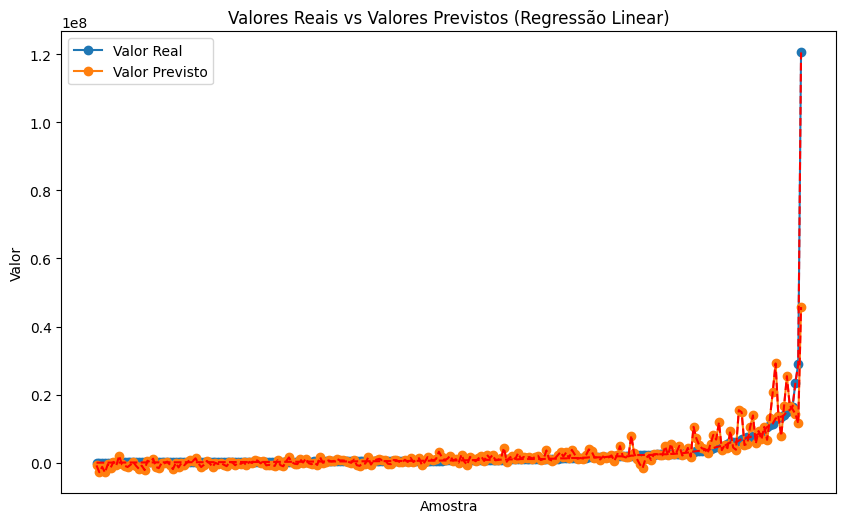

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred_linear = linear_regression.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Imprima as métricas de avaliação
print("Erro Quadrático Médio (MSE):", linear_mse)
print("Erro Absoluto Médio (MAE):", linear_mae)
print("R² Score:", linear_r2)

sample_size = 250

sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_linear[sample_indices]

result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

result_df = result_df.sort_values('Valor Real')

result_df = result_df.reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Linear)')
plt.legend()
plt.xticks([])
plt.show()

Erro Quadrático Médio (MSE): 2922948515374.371
Erro Absoluto Médio (MAE): 667424.1863978223
R² Score: 0.9108203474005165


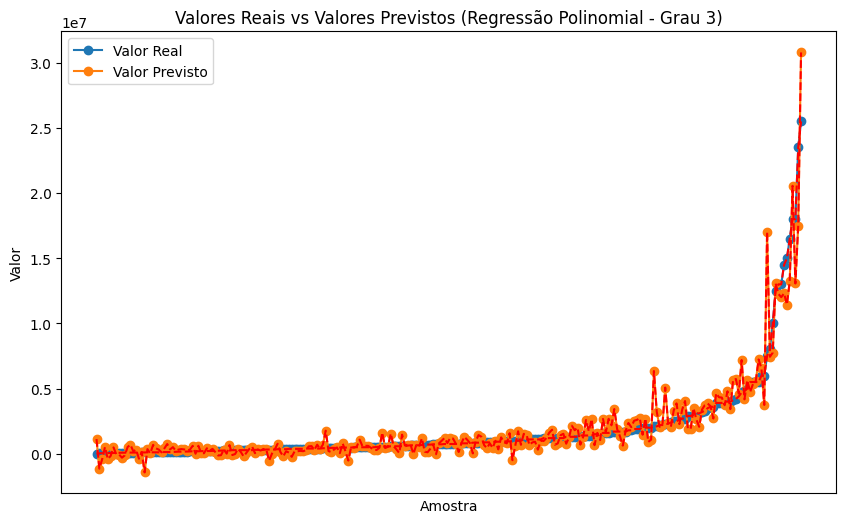

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 3  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

y_pred_linear = linear_regression.predict(X_test_poly)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Erro Quadrático Médio (MSE):", linear_mse)
print("Erro Absoluto Médio (MAE):", linear_mae)
print("R² Score:", linear_r2)

sample_size = 250

sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_linear[sample_indices]

result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Polinomial - Grau {})'.format(degree))
plt.legend()
plt.xticks([])
plt.show()

Erro Quadrático Médio (MSE): 2323423053896.263
Erro Absoluto Médio (MAE): 424693.925779652
R² Score: 0.9291119704304606


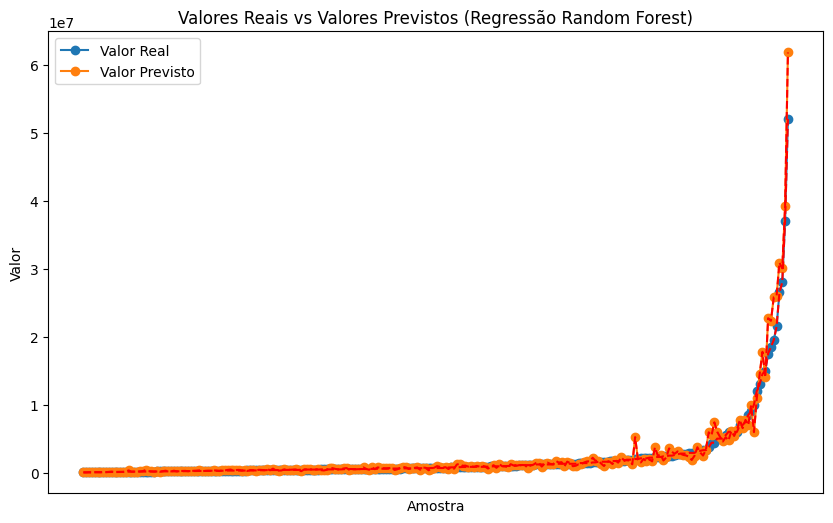

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Perform Random Forest Regression
n_estimators = 100  # Number of trees in the forest
random_forest = RandomForestRegressor(n_estimators=n_estimators)
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)

random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)
random_forest_mae = mean_absolute_error(y_test, y_pred_random_forest)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)

# Print evaluation metrics
print("Erro Quadrático Médio (MSE):", random_forest_mse)
print("Erro Absoluto Médio (MAE):", random_forest_mae)
print("R² Score:", random_forest_r2)

sample_size = 250  # Number of samples to plot

# Take a random sample from y_test and y_pred_random_forest
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_random_forest[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

# Sort the DataFrame by the actual values for better visualization
result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Random Forest)')
plt.legend()
plt.xticks([])
plt.show()

Mean Squared Error (MSE): 2653294392112.595
Mean Absolute Error (MAE): 505997.62047811435
R² Score: 0.9190475402190064


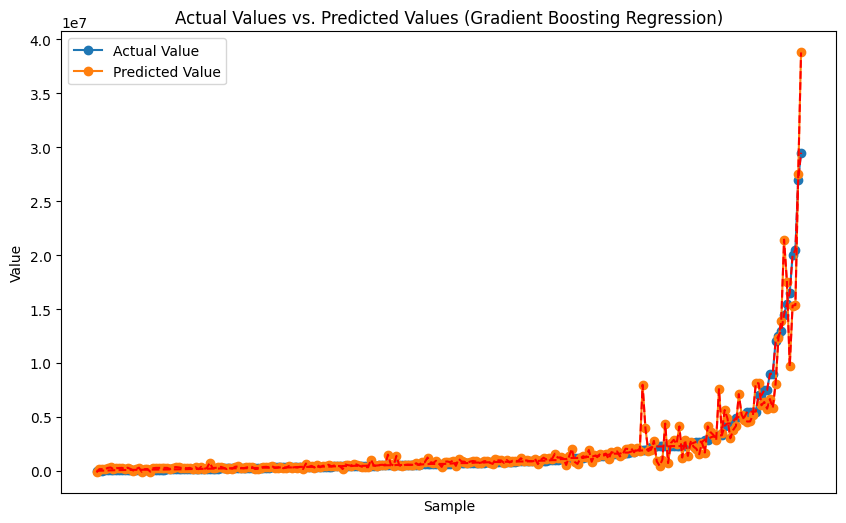

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Perform Gradient Boosting Regression
n_estimators = 100  # Number of boosting stages
learning_rate = 0.1  # Learning rate
gradient_boosting = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
gradient_boosting.fit(X_train, y_train)

y_pred_gradient_boosting = gradient_boosting.predict(X_test)

gradient_boosting_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gradient_boosting_mae = mean_absolute_error(y_test, y_pred_gradient_boosting)
gradient_boosting_r2 = r2_score(y_test, y_pred_gradient_boosting)

# Print evaluation metrics
print("Mean Squared Error (MSE):", gradient_boosting_mse)
print("Mean Absolute Error (MAE):", gradient_boosting_mae)
print("R² Score:", gradient_boosting_r2)

sample_size = 250  # Number of samples to plot

# Take a random sample from y_test and y_pred_gradient_boosting
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_gradient_boosting[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Predicted Value': y_pred_sample})
result_df = result_df.sort_values('Valor real')
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['valor real'], label='valor real', marker='o')
plt.plot(result_df.index, result_df['valor previsto'], label='valor previsto', marker='o')
plt.plot(result_df.index, result_df['valor real'], result_df['valor real'], color='red', linestyle='dashed')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual Values vs. Predicted Values (Gradient Boosting Regression)')
plt.legend()
plt.xticks([])
plt.show()

Mesmo processo sendo agora com overall

In [ ]:
X = df_fifa_imputed.drop(columns=['overall'])
y = df_fifa_imputed['overall']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

Erro Quadrático Médio (MSE): 4.81754031658387
Erro Absoluto Médio (MAE): 1.6874445088263135
R² Score: 0.904043205618056


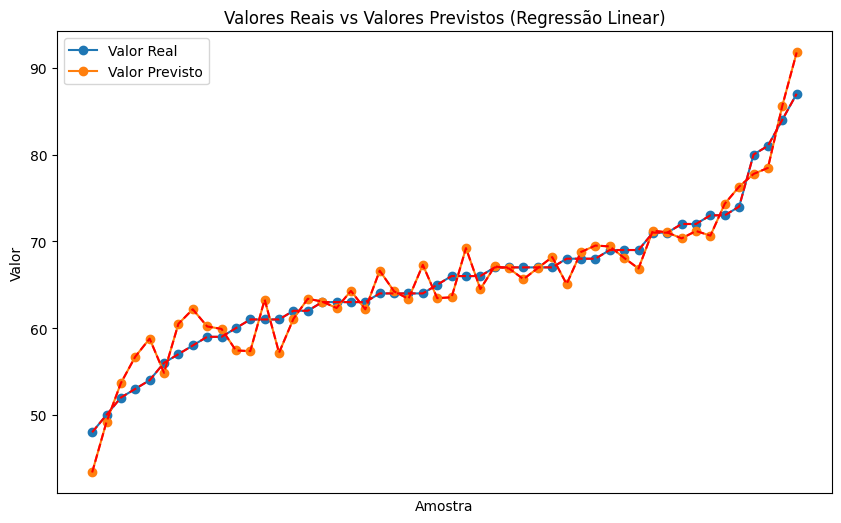

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred_linear = linear_regression.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
# Imprima as métricas de avaliação
print("Erro Quadrático Médio (MSE):", linear_mse)
print("Erro Absoluto Médio (MAE):", linear_mae)
print("R² Score:", linear_r2)

sample_size = 50  # Number of samples to plot

# Take a random sample from y_test and y_pred_linear
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_linear[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

# Sort the DataFrame by the actual values for better visualization
result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Linear)')
plt.legend()
plt.xticks([])
plt.show()

Erro Quadrático Médio (MSE): 17.02647099844601
Erro Absoluto Médio (MAE): 2.99507578930317
R² Score: 0.6608631232365996


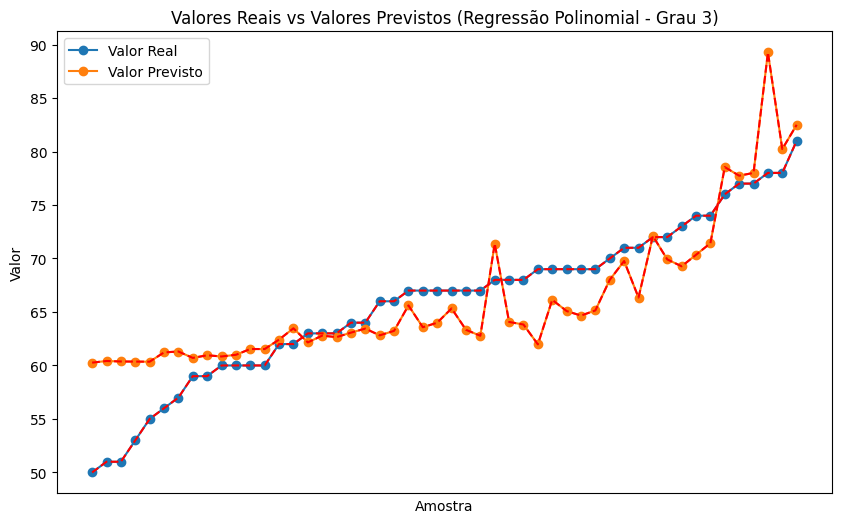

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 3  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Perform polynomial regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

y_pred_linear = linear_regression.predict(X_test_poly)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("Erro Quadrático Médio (MSE):", linear_mse)
print("Erro Absoluto Médio (MAE):", linear_mae)
print("R² Score:", linear_r2)

sample_size = 50  # Number of samples to plot

# Take a random sample from y_test and y_pred_linear
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_linear[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

# Sort the DataFrame by the actual values for better visualization
result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Polinomial - Grau {})'.format(degree))
plt.legend()
plt.xticks([])
plt.show()

Erro Quadrático Médio (MSE): 0.6090597339527027
Erro Absoluto Médio (MAE): 0.46659417229729744
R² Score: 0.9878686184615756


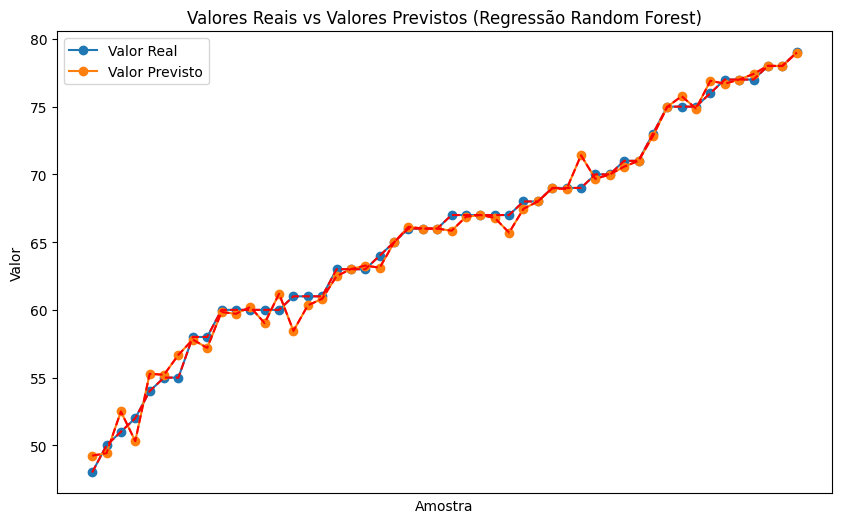

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Perform Random Forest Regression
n_estimators = 100  # Number of trees in the forest
random_forest = RandomForestRegressor(n_estimators=n_estimators)
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)

random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)
random_forest_mae = mean_absolute_error(y_test, y_pred_random_forest)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)

# Print evaluation metrics
print("Erro Quadrático Médio (MSE):", random_forest_mse)
print("Erro Absoluto Médio (MAE):", random_forest_mae)
print("R² Score:", random_forest_r2)

sample_size = 50  # Number of samples to plot

# Take a random sample from y_test and y_pred_random_forest
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_random_forest[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

# Sort the DataFrame by the actual values for better visualization
result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Random Forest)')
plt.legend()
plt.xticks([])
plt.show()

Mean Squared Error (MSE): 1.4550642345648623
Mean Absolute Error (MAE): 0.8983691761211544
R² Score: 0.9710177205807655


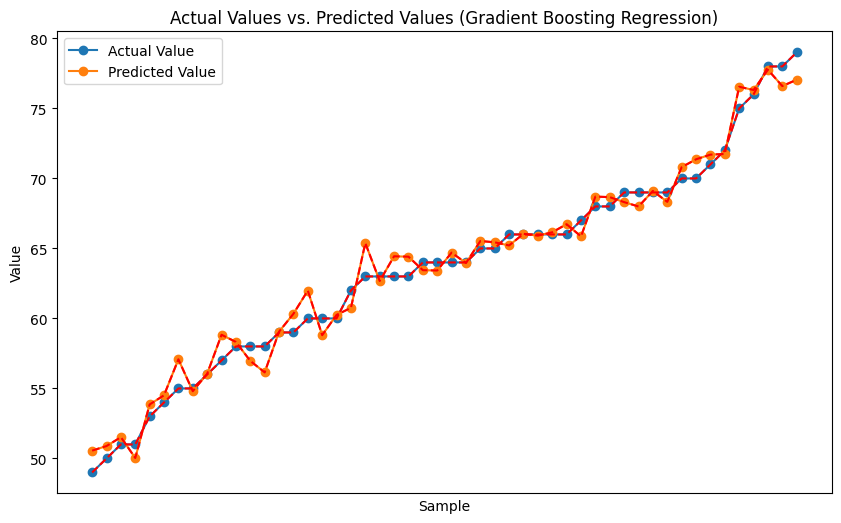

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Perform Gradient Boosting Regression
n_estimators = 100  # Number of boosting stages
learning_rate = 0.1  # Learning rate
gradient_boosting = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
gradient_boosting.fit(X_train, y_train)

y_pred_gradient_boosting = gradient_boosting.predict(X_test)

gradient_boosting_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gradient_boosting_mae = mean_absolute_error(y_test, y_pred_gradient_boosting)
gradient_boosting_r2 = r2_score(y_test, y_pred_gradient_boosting)

# Print evaluation metrics
print("Mean Squared Error (MSE):", gradient_boosting_mse)
print("Mean Absolute Error (MAE):", gradient_boosting_mae)
print("R² Score:", gradient_boosting_r2)

sample_size = 50  # Number of samples to plot

# Take a random sample from y_test and y_pred_gradient_boosting
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_gradient_boosting[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Actual Value': y_test_sample, 'Predicted Value': y_pred_sample})
result_df = result_df.sort_values('Actual Value')
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Actual Value'], label='Actual Value', marker='o')
plt.plot(result_df.index, result_df['Predicted Value'], label='Predicted Value', marker='o')
plt.plot(result_df.index, result_df['Actual Value'], result_df['Predicted Value'], color='red', linestyle='dashed')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual Values vs. Predicted Values (Gradient Boosting Regression)')
plt.legend()
plt.xticks([])
plt.show()

Agora com potential

In [ ]:
X = df_fifa_imputed.drop(columns=['potential'])
y = df_fifa_imputed['potential']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

Erro Quadrático Médio (MSE): 6.396362553566573
Erro Absoluto Médio (MAE): 1.9432061247691659
R² Score: 0.8389556184136304


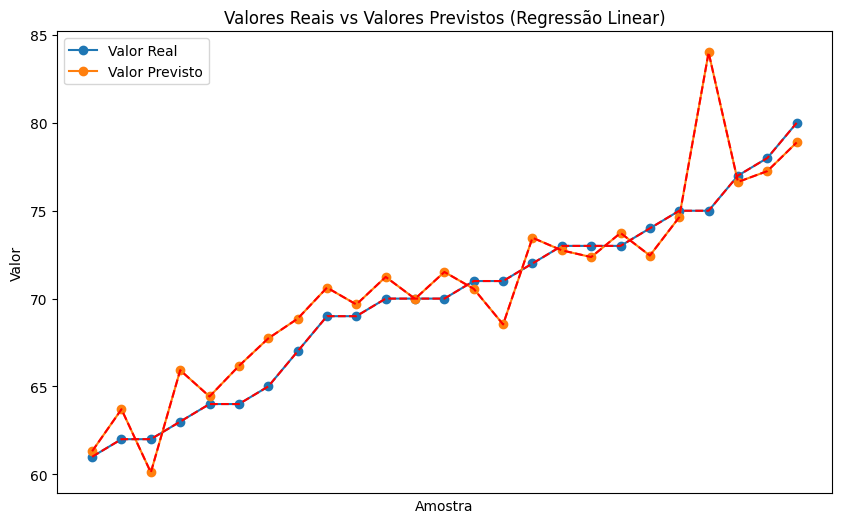

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred_linear = linear_regression.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
# Imprima as métricas de avaliação
print("Erro Quadrático Médio (MSE):", linear_mse)
print("Erro Absoluto Médio (MAE):", linear_mae)
print("R² Score:", linear_r2)

sample_size = 25  # Number of samples to plot

# Take a random sample from y_test and y_pred_linear
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_linear[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

# Sort the DataFrame by the actual values for better visualization
result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Linear)')
plt.legend()
plt.xticks([])
plt.show()

Erro Quadrático Médio (MSE): 26.018121608077468
Erro Absoluto Médio (MAE): 3.4546450695315354
R² Score: 0.3449288921129968


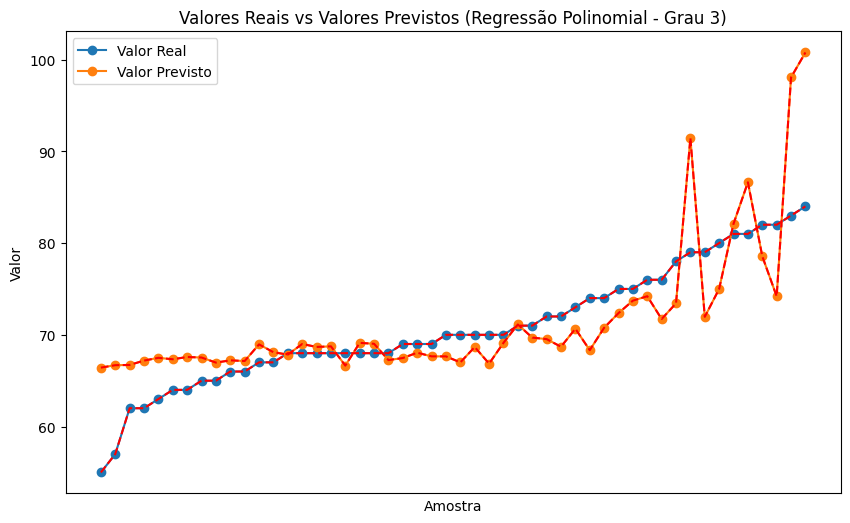

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 3  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Perform polynomial regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)

y_pred_linear = linear_regression.predict(X_test_poly)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Print evaluation metrics
print("Erro Quadrático Médio (MSE):", linear_mse)
print("Erro Absoluto Médio (MAE):", linear_mae)
print("R² Score:", linear_r2)

sample_size = 50  # Number of samples to plot

# Take a random sample from y_test and y_pred_linear
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_linear[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

# Sort the DataFrame by the actual values for better visualization
result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Polinomial - Grau {})'.format(degree))
plt.legend()
plt.xticks([])
plt.show()

Erro Quadrático Médio (MSE): 1.6624095928441793
Erro Absoluto Médio (MAE): 0.7601432367076899
R² Score: 0.95814469199005


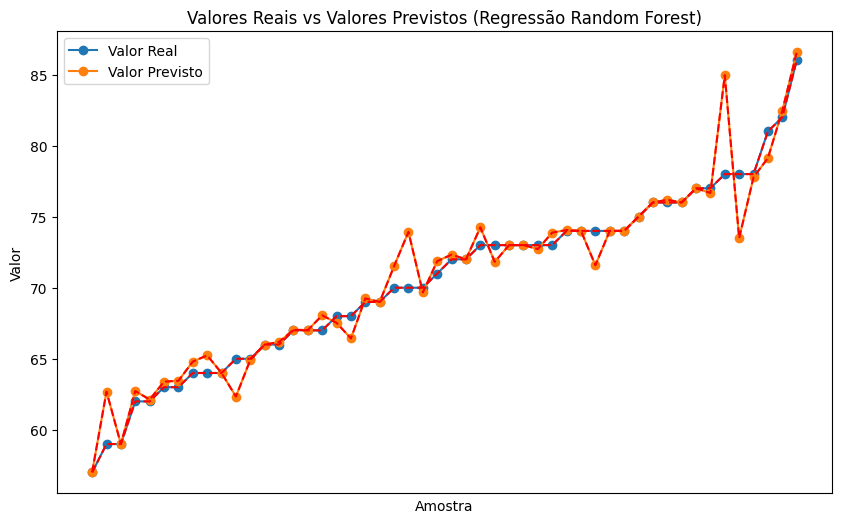

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
random_forest = RandomForestRegressor(n_estimators=n_estimators)
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)

random_forest_mse = mean_squared_error(y_test, y_pred_random_forest)
random_forest_mae = mean_absolute_error(y_test, y_pred_random_forest)
random_forest_r2 = r2_score(y_test, y_pred_random_forest)

# Print evaluation metrics
print("Erro Quadrático Médio (MSE):", random_forest_mse)
print("Erro Absoluto Médio (MAE):", random_forest_mae)
print("R² Score:", random_forest_r2)

sample_size = 50  # Number of samples to plot

# Take a random sample from y_test and y_pred_random_forest
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_random_forest[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Valor Real': y_test_sample, 'Valor Previsto': y_pred_sample})

# Sort the DataFrame by the actual values for better visualization
result_df = result_df.sort_values('Valor Real')

# Reset the index of the DataFrame for better plotting
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Valor Real'], label='Valor Real', marker='o')
plt.plot(result_df.index, result_df['Valor Previsto'], label='Valor Previsto', marker='o')
plt.plot(result_df.index, result_df['Valor Real'], result_df['Valor Previsto'], color='red', linestyle='dashed')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs Valores Previstos (Regressão Random Forest)')
plt.legend()
plt.xticks([])
plt.show()

Mean Squared Error (MSE): 2.8085229614936167
Mean Absolute Error (MAE): 1.1784033840344523
R² Score: 0.9292884292100264


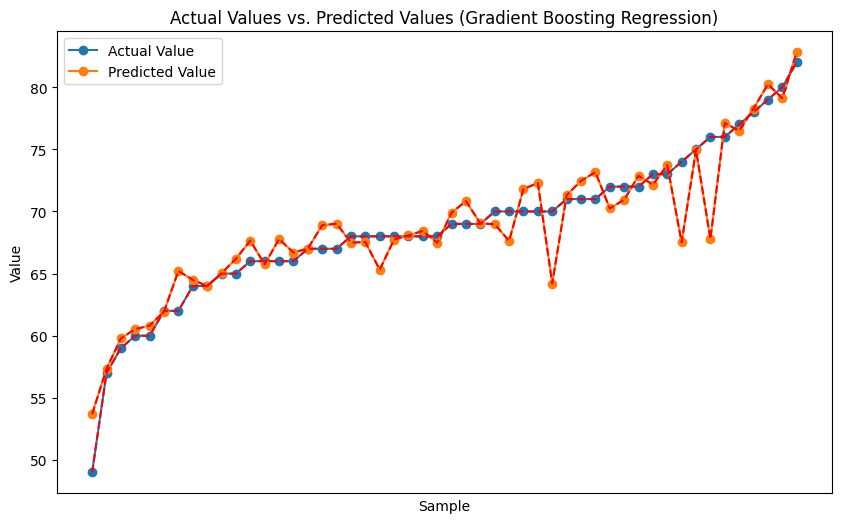

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Perform Gradient Boosting Regression
n_estimators = 100  # Number of boosting stages
learning_rate = 0.1  # Learning rate
gradient_boosting = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
gradient_boosting.fit(X_train, y_train)

y_pred_gradient_boosting = gradient_boosting.predict(X_test)

gradient_boosting_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gradient_boosting_mae = mean_absolute_error(y_test, y_pred_gradient_boosting)
gradient_boosting_r2 = r2_score(y_test, y_pred_gradient_boosting)

# Print evaluation metrics
print("Mean Squared Error (MSE):", gradient_boosting_mse)
print("Mean Absolute Error (MAE):", gradient_boosting_mae)
print("R² Score:", gradient_boosting_r2)

sample_size = 50  # Number of samples to plot

# Take a random sample from y_test and y_pred_gradient_boosting
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_gradient_boosting[sample_indices]

# Create a DataFrame with the actual values and the predicted values
result_df = pd.DataFrame({'Actual Value': y_test_sample, 'Predicted Value': y_pred_sample})
result_df = result_df.sort_values('Actual Value')
result_df = result_df.reset_index(drop=True)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(result_df.index, result_df['Actual Value'], label='Actual Value', marker='o')
plt.plot(result_df.index, result_df['Predicted Value'], label='Predicted Value', marker='o')
plt.plot(result_df.index, result_df['Actual Value'], result_df['Predicted Value'], color='red', linestyle='dashed')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual Values vs. Predicted Values (Gradient Boosting Regression)')
plt.legend()
plt.xticks([])
plt.show()